In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib import rcParams
from matplotlib import patches
import xarray as xr
import scipy.io
import astropy.constants as const
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
from astropy.io import fits
import pandas as pd
import sunpy.visualization.colormaps as cm
sdoaia193 = plt.get_cmap('sdoaia193')
plt.style.use('science')
rcParams['axes.linewidth'] = 1.2
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'cm'

In [2]:
sav_0305 = scipy.io.readsav('../src/aia_lvl15/20110305.sav',verbose = False,python_dict=True)
sav_0306 = scipy.io.readsav('../src/aia_lvl15/20110306.sav',verbose = False,python_dict=True)
sav_0311 = scipy.io.readsav('../src/aia_lvl15/20110311.sav',verbose = False,python_dict=True)

In [3]:
data_0305 = sav_0305['out_data']
header_0305 = sav_0305['out_index']
data_0306 = sav_0306['out_data']
header_0306 = sav_0306['out_index']
data_0311 = sav_0311['out_data']
header_0311 = sav_0311['out_index']

In [8]:
data_0305.shape

(10, 2048, 3582)

In [4]:
hdul = fits.open("../src/aia_lvl15/AIA20110305_184507_0193.fits")
hdul[0].header

SIMPLE  =                    T / Written by IDL:  Tue Jul 28 05:27:14 2020      
BITPIX  =                   16 / Integer*2 (short integer)                      
NAXIS   =                    2 /                                                
NAXIS1  =                 3582 /                                                
NAXIS2  =                 2048 /                                                
BLD_VERS= 'V5R12X  '           /                                                
LVL_NUM =        1.50000000000 /                                                
T_REC   = '2011-03-05T18:45:09Z' /                                              
TRECSTEP=        1.00000000000 /                                                
TRECEPOC= '1977.01.01_00:00:00_TAI' /                                           
TRECROUN=                    1 /                                                
ORIGIN  = 'SDO     '           /                                                
DATE    = '2020-07-16T02:42:

In [56]:
header_0305[0]

(1, 16, 2, 3582, 2048, b'V5R12X', 1.5, b'2011-03-05T18:45:09Z', 1., b'1977.01.01_00:00:00_TAI', 1, b'SDO', b'2020-07-16T02:42:12', b'SDO', b'AIA_2', b'2011-03-05T18:45:07.84', b'2011-03-05T18:45:08.84Z', 2, b'LIGHT', 1.999668, 0.000112, 2.273438, 193, b'angstrom', b'193_THIN', 21857651, 0, 0, 0, 16777216, 16777216, 0, 100., -5, 14333, 188, 285.34823608, 4.34990776e+10, 5.48879766, 46.28560257, 283.31, 0., 11., 38., 358., 679., 1046., 1718., 2392., 2, b'nan', b'nan', b'aia.flatfield[:#10]', 12971, b'HPLN-TAN', b'arcsec', 0., 0.60071406, 1795.920044, b'HPLT-TAN', b'arcsec', 0., 0.60071406, 2041.26001, 0.05794, 1610.03211061, b'sdo.master_pointing[:#113]', 0.135679, 0.600299, 2044.920044, 2040.26001, b'sdo.lev0_asd_0004[:#8652738]', -7.591313, 8.661163, 0.000151, b'SCIENCE', b'NO', b'YES', b'NO', b'GT3', b'sdo.fds_orbit_vectors[2011.03.05_18:45:00_UTC]', 1.49597871e+11, 1.48341947e+11, 6.96e+08, 967.769632, 40073403.3, -7563904.49, 10733446.89, -1.4307538e+11, 3.91761253e+10, 9658402.68, 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


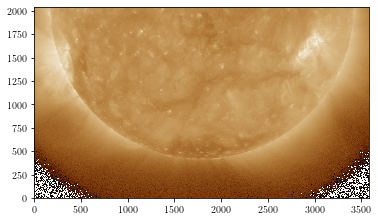

In [12]:
plt.imshow(np.log10(data_0305[0,:,:]),origin="lower",cmap=sdoaia193)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


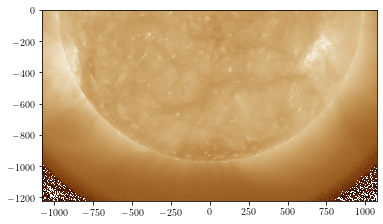

In [30]:
plt.imshow(np.log10(np.mean(data_0305[:,:,:],axis=0)),origin="lower",cmap=sdoaia193,
          extent = [-1795.92 * 0.600714055060, (-1795.92 + 3582) * 0.600714055060,-2041.26 * 0.600714055060,(-2041.26 + 2048) * 0.600714055060])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10


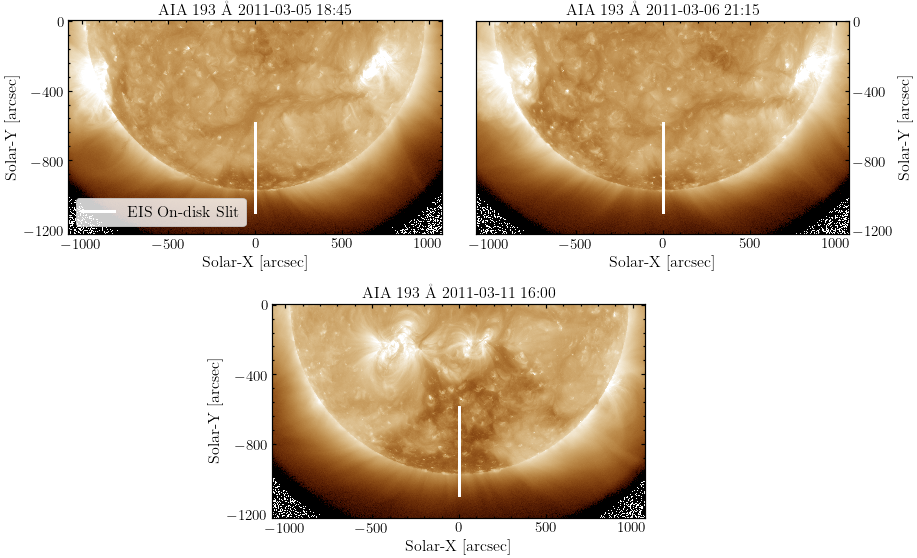

In [10]:
fig, ax = plt.subplots(figsize = (14,10))
ax1 = plt.subplot2grid((4,4),(0,0),rowspan = 2,colspan = 2)
ax2 = plt.subplot2grid((4,4),(0,2),rowspan = 2,colspan = 2)
ax3 = plt.subplot2grid((4,4),(2,1),rowspan = 2,colspan = 2)

vmin, vmax = np.log10(np.percentile(np.mean(data_0305[:,:,:],axis=0),[5,99]))
ax1.imshow(np.log10(np.mean(data_0305[:,:,:],axis=0)),origin="lower",cmap=sdoaia193,vmin=vmin,vmax = vmax,
          extent = [-1795.92 * 0.600714055060, (-1795.92 + 3582) * 0.600714055060,-2041.26 * 0.600714055060,(-2041.26 + 2048) * 0.600714055060])

ax1.set_title("AIA 193 \mbox{\AA} 2011-03-05 18:45",fontsize=16)

ax2.imshow(np.log10(np.mean(data_0306[:,:,:],axis=0)),origin="lower",cmap=sdoaia193,vmin=vmin,vmax=vmax,
          extent = [-1795.92 * 0.600714055060, (-1795.85 + 3582) * 0.600714055060,-2041.26 * 0.600714055060,(-2041.86 + 2048) * 0.600714055060])

ax2.set_title("AIA 193 \mbox{\AA} 2011-03-06 21:15",fontsize=16)

ax3.imshow(np.log10(np.mean(data_0311[:,:,:],axis=0)),origin="lower",cmap=sdoaia193,vmin=vmin,vmax=vmax,
          extent = [-1795.92 * 0.600714055060, (-1795.85 + 3582) * 0.600714055060,-2041.26 * 0.600714055060,(-2041.86 + 2048) * 0.600714055060])

ax3.set_title("AIA 193 \mbox{\AA} 2011-03-11 16:00",fontsize=16)

for ax_ in (ax1, ax2, ax3):
    ln, = ax_.plot([0,0],[-842 + 256, -842- 256],color = "white",label="EIS On-disk Slit",lw=3)
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
    ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
    ax_.tick_params(labelsize=15)
    ax_.tick_params(which="major",width=1.2,length=4)
    ax_.tick_params(which="minor",width=1.2,length=2)
    ax_.yaxis.set_major_locator(ticker.MaxNLocator(4))
    ax_.xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax_.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax_.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
leg = [ln]
ax1.legend(leg,[leg_.get_label() for leg_ in leg],loc = 'lower left',fontsize = 16,frameon=True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

#plt.subplots_adjust(bottom = 0.02,left=0.07,top=1,right=0.92,hspace=-0.02)
plt.savefig(fname = '../figs/aia_eis.pdf', dpi = 300, format = 'pdf')